# Heart Disease Prediction Project

This project aims to build and evaluate multiple machine learning models to predict the presence of heart disease based on various health-related features. The steps include data loading, exploration, preprocessing, model training, and evaluation.

## 1. Importing Necessary Libraries

In [1]:
# Import core libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Machine learning tools
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Import warnings to ignore any warnings that may arise
import warnings
warnings.filterwarnings("ignore")

# Set options for pandas to display all columns and rows
pd.set_option('display.max_columns', None)

## 2. Data Retrieval

In [4]:
from ucimlrepo import fetch_ucirepo 

# Fetch the dataset from UCI Machine Learning Repository
heart_disease = fetch_ucirepo(id=45)
features = heart_disease.data.features
targets = heart_disease.data.targets
df = pd.concat([features, targets], axis=1)

## 3. Exploratory Data Analysis (EDA)

In [5]:
# Basic information and summary statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [6]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [7]:
# Check for null values
print(df.isnull().sum())

# Fill missing values
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

# Binarize the target variable
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


Visualizations

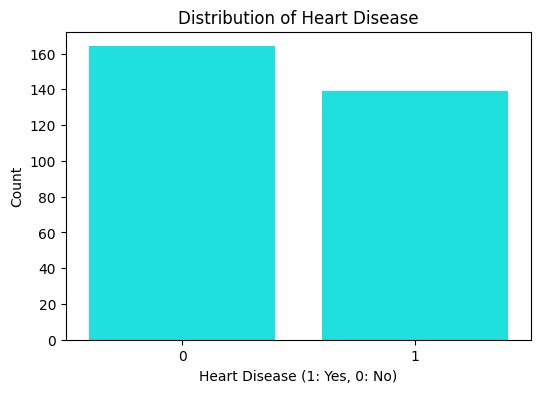

In [8]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='num', color='aqua')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

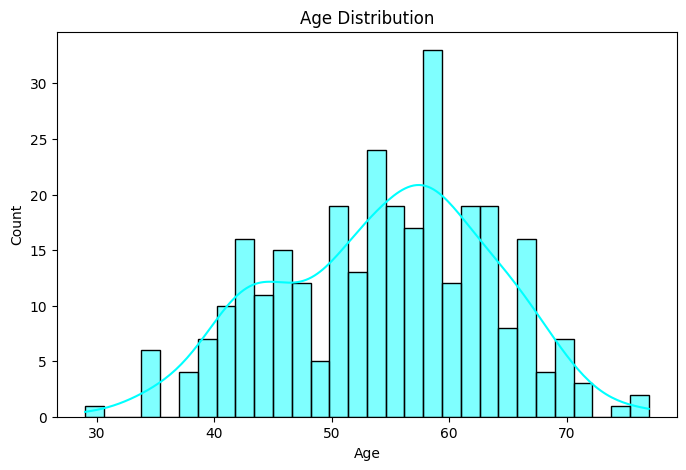

In [9]:
# Distribution of Age
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', bins=30, kde=True, color='aqua')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

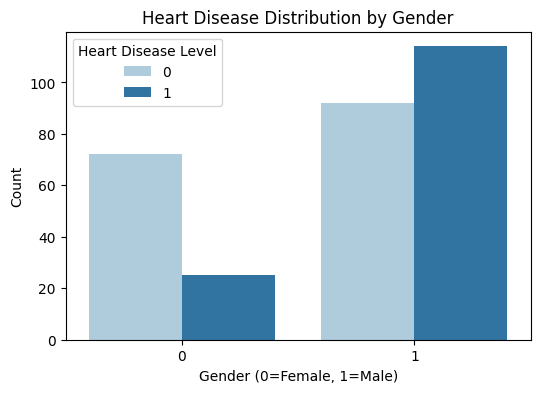

In [10]:
# Heart Disease by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sex', hue='num', palette='Paired')
plt.title('Heart Disease Distribution by Gender')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease Level')
plt.show()

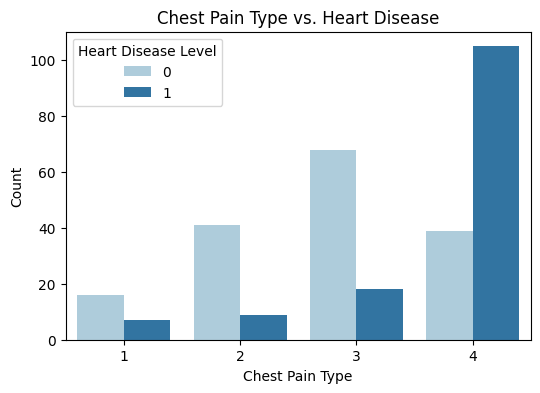

In [11]:
# Chest Pain Type vs. Heart Disease
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='cp', hue='num', palette='Paired')
plt.title('Chest Pain Type vs. Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease Level')
plt.show()

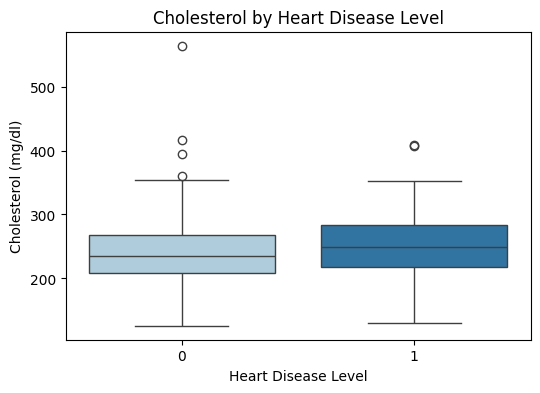

In [12]:
# Cholesterol by Disease Level (Boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='num', y='chol', palette='Paired')
plt.title('Cholesterol by Heart Disease Level')
plt.xlabel('Heart Disease Level')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()

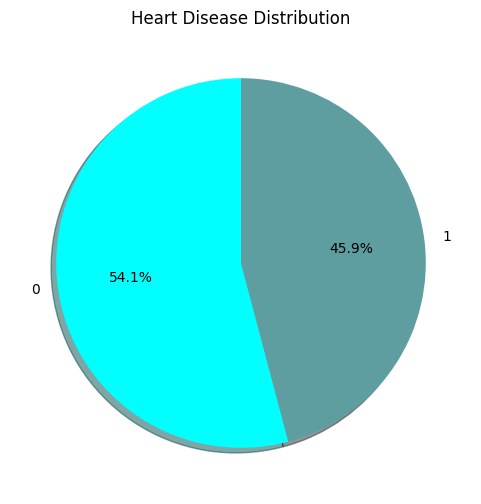

In [13]:
# Heart Disease Distribution
plt.figure(figsize=(6,6))
df['num'].value_counts().plot.pie(autopct='%1.1f%%', colors=['aqua', 'cadetblue'], startangle=90, shadow=True)
plt.title('Heart Disease Distribution')
plt.ylabel('')
plt.show()


<Figure size 1000x800 with 0 Axes>

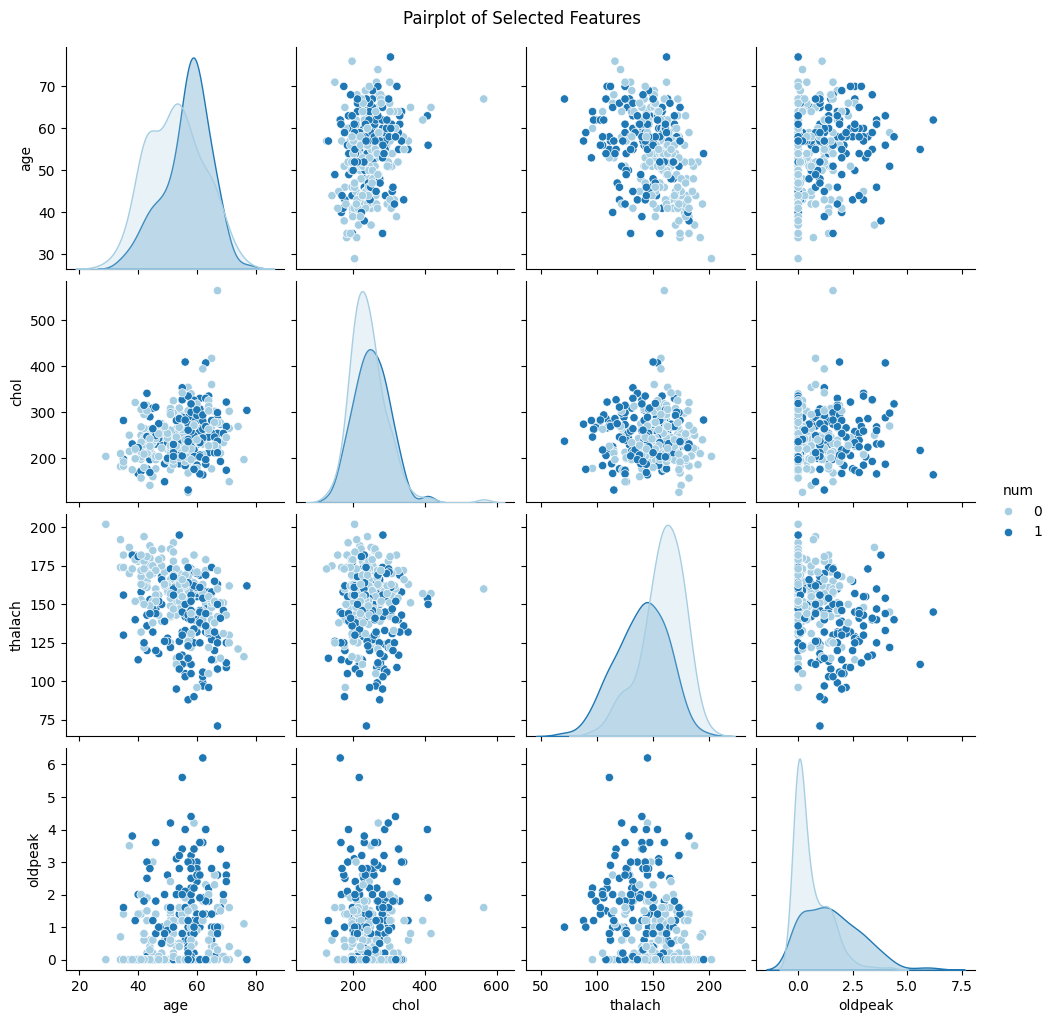

In [14]:
# Pairplot of selected features
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='num', vars=['age', 'chol', 'thalach', 'oldpeak'], palette='Paired')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

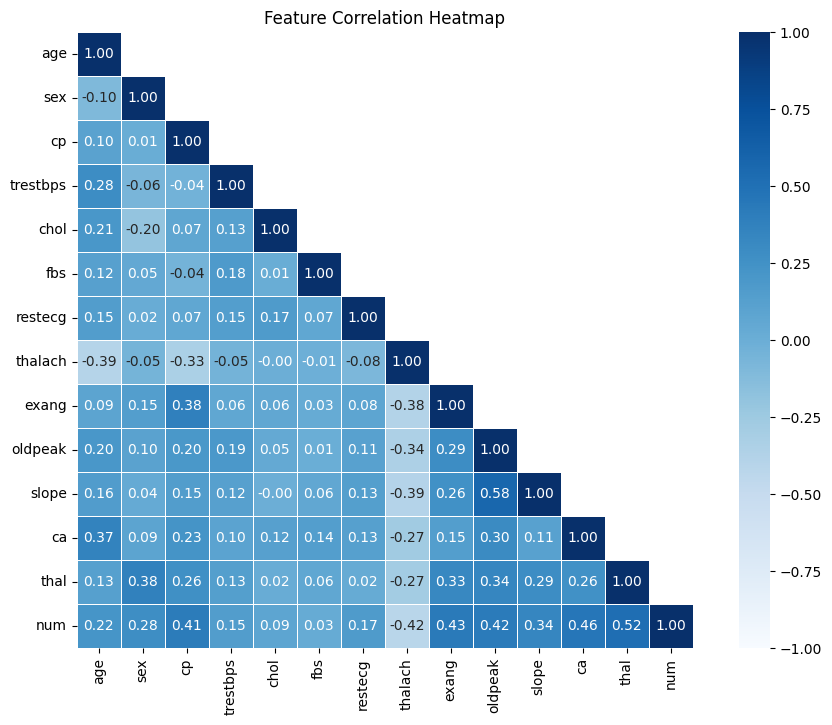

In [15]:
# Correlation heatmap
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, square=True, vmax=1, vmin=-1)

plt.title('Feature Correlation Heatmap')
plt.show()

## 4. Data Preprocessing

This step involves splitting the data, scaling the features, and preparing for model training.

In [16]:
# Separate features and target
X = df.drop('num', axis=1)
y = df['num']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Model Building and Hypermeter tuning

### Logistic Regression

In [17]:
# Train and evaluate Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Print performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8852459016393442
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
 [[25  4]
 [ 3 29]]


In [18]:
# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],          # Regularization type
    'C': [0.01, 0.1, 1, 10, 100],                           # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg'],  # Optimization algorithm
    'max_iter': [100, 200, 500, 1000],                      # Maximum number of iterations
    'class_weight': [None, 'balanced'],                     # Class weight adjustment
    'l1_ratio': [0, 0.1, 0.5, 0.7, 1]                       # L1 ratio for elasticnet penalty
}



# Initialize the Logistic Regression model
lr = LogisticRegression()

# Define stratified cross-validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object
grid_search_lr = GridSearchCV(
    estimator=lr,               # Estimator
    param_grid=param_grid_lr,   # Parameter grid
    scoring='roc_auc',          # Use accuracy as the scoring metric
    cv=stratified_cv,           # 5-fold cross-validation
    n_jobs=-1,                  # Use all cores
    verbose=1                   # Print progress
)

# Fit GridSearchCV
grid_search_lr.fit(X_train_scaled, y_train)

# Get best estimator and predictions
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_scaled)

Fitting 5 folds for each of 3200 candidates, totalling 16000 fits


Best Parameters: {'C': 0.01, 'class_weight': None, 'l1_ratio': 0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8984607984607985
Test Accuracy: 0.8852459016393442
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
 [[26  3]
 [ 4 28]]


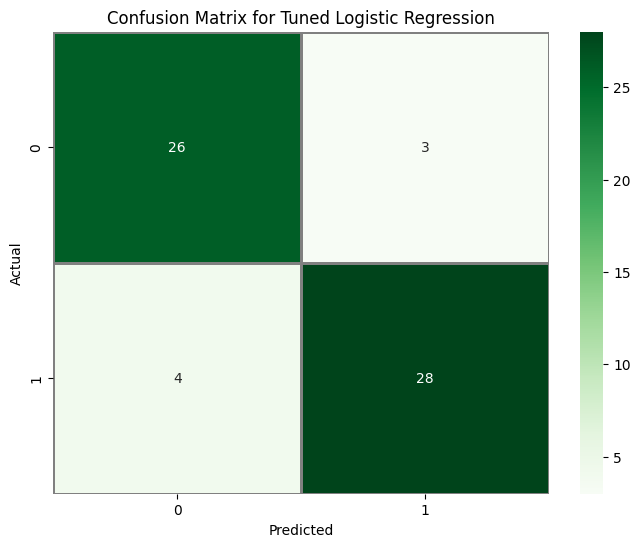

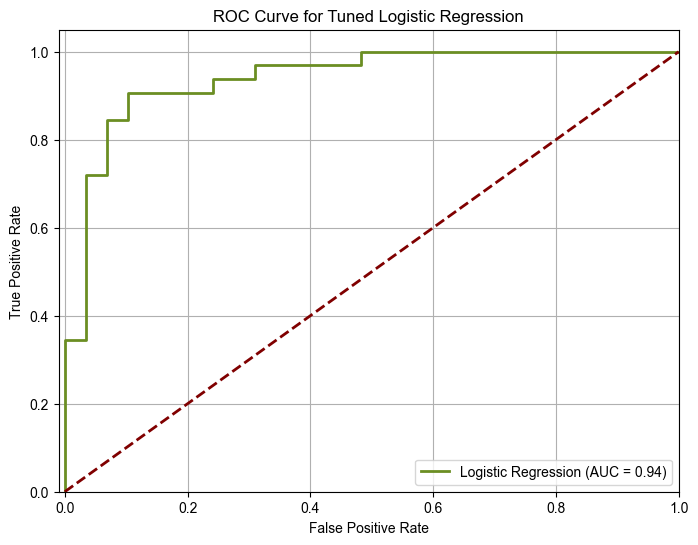

In [19]:
# Evaluation
print("Best Parameters:", grid_search_lr.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_lr.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens', linecolor='gray', linewidths=1)
plt.title("Confusion Matrix for Tuned Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Get predicted probabilities for the positive class
y_probs_lr = best_lr.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_lr)
roc_auc = roc_auc_score(y_test, y_probs_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='olivedrab', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='maroon', lw=2, linestyle='--')  # Diagonal line
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Logistic Regression')
plt.legend(loc='lower right')
sns.set_style("whitegrid")
plt.grid(True)
plt.show()

### Random Forest

In [20]:
# Train and evaluate Random Forest
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Print performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9016393442622951
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix:
 [[27  2]
 [ 4 28]]


In [21]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100],                 # Number of trees in the forest
    'criterion': ['gini', 'entropy', 'log_loss'],        # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 50],                     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],                       # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],                          # Whether bootstrap samples are used
    'class_weight': [None, 'balanced'],                  # Class weights for imbalanced datasets
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=stratified_cv,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search_rf.fit(X_train_scaled, y_train)

# Get best estimator and predictions
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


Best Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation AUC: 0.9006734006734007
Test Accuracy: 0.8688524590163934
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
 [[25  4]
 [ 4 28]]


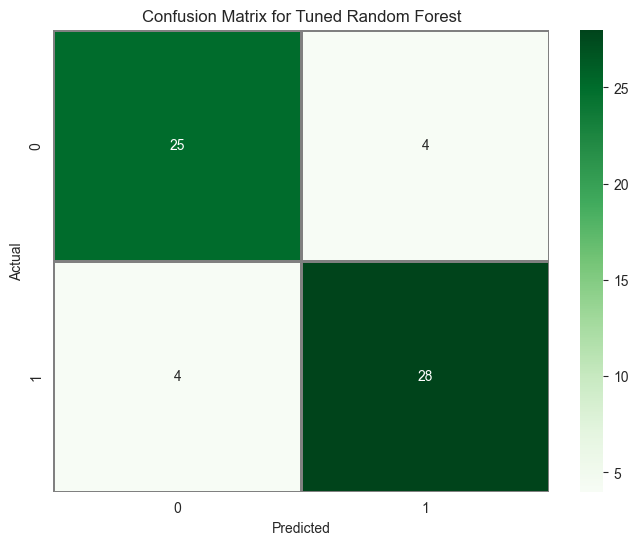

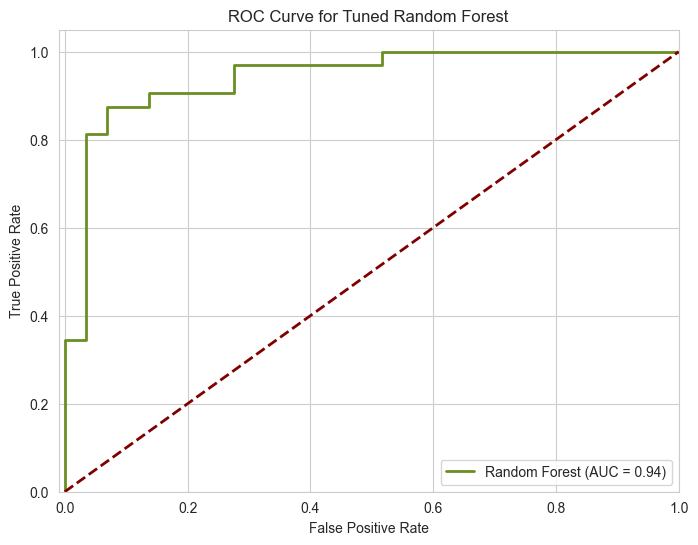

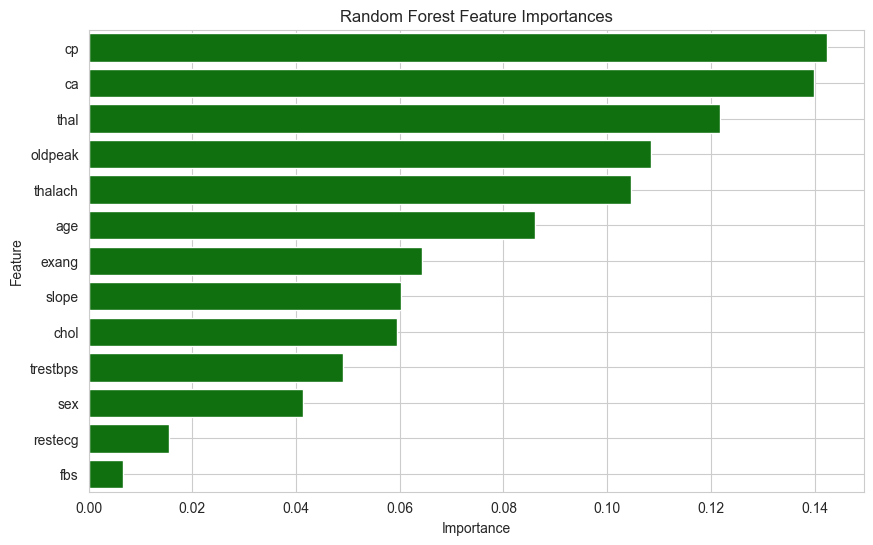

In [22]:
# Evaluation
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validation AUC:", grid_search_rf.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', linecolor='gray', linewidths=1)
plt.title("Confusion Matrix for Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Get predicted probabilities for the positive class
y_probs_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf)
roc_auc_rf = roc_auc_score(y_test, y_probs_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='olivedrab', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='maroon', lw=2, linestyle='--')  # Diagonal line
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Random Forest')
plt.legend(loc='lower right')
sns.set_style("whitegrid")
plt.grid(True)
plt.show()

feature_names = X_train.columns

# Create a DataFrame for feature importances
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_rf.feature_importances_
})

# Sort descending
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, color='Green')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


### Support Vector Machine

In [23]:
# Train and evaluate Support Vector Machine
model = SVC()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Print performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9016393442622951
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix:
 [[27  2]
 [ 4 28]]


In [24]:
# Define the parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100],                         # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], # Kernel type
    'degree': [2, 3, 4],                            # Degree for 'poly' kernel
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],       # Kernel coefficient
    'class_weight': [None, 'balanced'],             # Class weights for imbalance
    'probability': [True],                          # Enable probability estimates (needed for ROC AUC)
}

# Initialize the SVC model
svc = SVC(random_state=42)

# Create the GridSearchCV object
grid_search_svc = GridSearchCV(
    estimator=svc,
    param_grid=param_grid_svc,
    scoring='roc_auc',
    cv=stratified_cv,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search_svc.fit(X_train_scaled, y_train)

# Get best estimator and predictions
best_svc = grid_search_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test_scaled)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


Best Parameters: {'C': 1, 'class_weight': None, 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid', 'probability': True}
Best Cross-Validation AUC: 0.9025332691999358
Test Accuracy: 0.8852459016393442
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
 [[26  3]
 [ 4 28]]


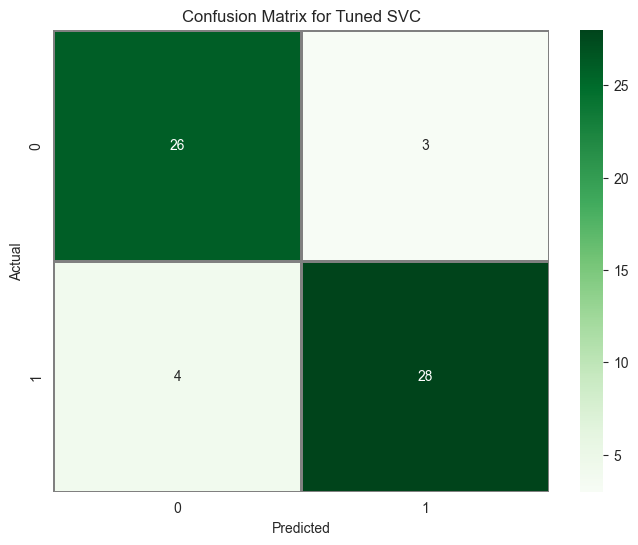

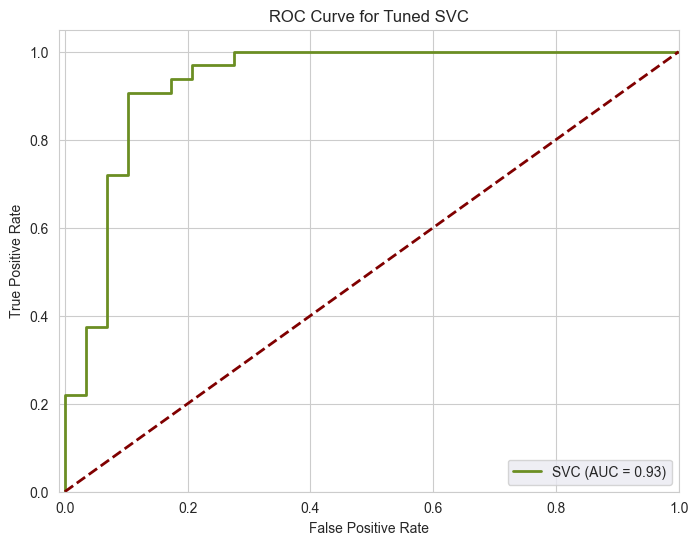

In [25]:
# Evaluation
print("Best Parameters:", grid_search_svc.best_params_)
print("Best Cross-Validation AUC:", grid_search_svc.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Greens', linecolor='gray', linewidths=1)
plt.title("Confusion Matrix for Tuned SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Get predicted probabilities for the positive class (SVC must be fitted with probability=True)
y_probs_svc = best_svc.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_svc)
roc_auc_svc = roc_auc_score(y_test, y_probs_svc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='olivedrab', lw=2, label=f'SVC (AUC = {roc_auc_svc:.2f})')
sns.set_style("darkgrid")
plt.plot([0, 1], [0, 1], color='maroon', lw=2, linestyle='--')  # Diagonal line
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned SVC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### KNN

In [26]:
# Train and evaluate K-Nearest Neighbors
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Print performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9180327868852459
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

Confusion Matrix:
 [[27  2]
 [ 3 29]]


In [27]:
# Define the parameter grid for K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],                        # Neighbors to use
    'weights': ['uniform', 'distance'],                     # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],      # Distance metric
    'p': [1, 2],                                            # Power parameter for the Minkowski distance
    'leaf_size': [10, 20, 30, 40],                          # Leaf size passed to BallTree or KDTree
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute the nearest neighbors
}

# KNN modelini başlat
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    scoring='roc_auc',
    cv=stratified_cv,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search_knn.fit(X_train_scaled, y_train)

# Get best estimator and predictions
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)


Fitting 5 folds for each of 960 candidates, totalling 4800 fits


Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.8975789642456309
Test Accuracy: 0.8852459016393442
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
 [[26  3]
 [ 4 28]]


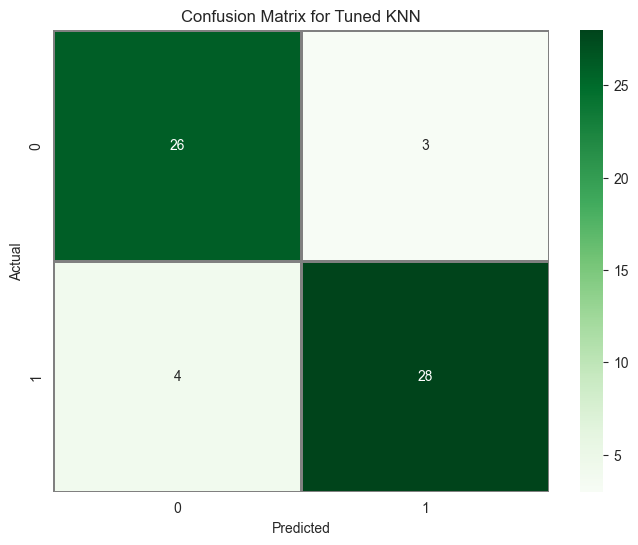

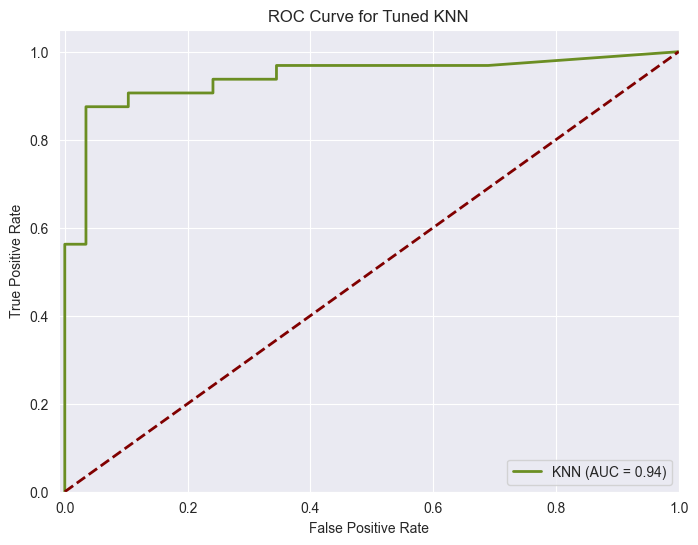

In [28]:
# Evaluation
print("Best Parameters:", grid_search_knn.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_knn.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d',
            cmap='Greens', linecolor='gray', linewidths=1)
plt.title("Confusion Matrix for Tuned KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Predicted probabilities (only for the positive class)
y_probs_knn = best_knn.predict_proba(X_test_scaled)[:, 1]

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs_knn)
roc_auc = roc_auc_score(y_test, y_probs_knn)

# ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='olivedrab', lw=2, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='maroon', lw=2, linestyle='--')  # Diagonal line
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned KNN')
plt.legend(loc='lower right')
sns.set_style("whitegrid")
plt.grid(True)
plt.show()
